In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [155]:
#pd.set_option('display.max_columns', None)
sns.set(style="whitegrid", palette="viridis")

In [156]:
df = pd.read_csv("tourism_data.csv")

In [157]:
print("First 5 rows: \n", df.head())


First 5 rows: 
    YEARS  Tourists_Number  Overnight_Stay  Tourists_Spending  Avg_Stay  \
0   2015              6.0            59.0               43.0      10.0   
1   2015              6.0            59.0               43.0      10.0   
2   2015              0.0             0.0                0.0       0.0   
3   2015              0.0             0.0                0.0       0.0   
4   2015           1041.0          8807.0             1120.0       8.5   

   Avg_Spending_Trip  Avg_Spending_Night Province Tourism_Type  
0             7029.0               727.0   Albaha      Inbound  
1             7029.0               727.0   Albaha      Inbound  
2                0.0                 0.0   Albaha      Inbound  
3                0.0                 0.0   Albaha      Inbound  
4             1075.0               127.0   Albaha     Domestic  


In [158]:
print("Columns:", df.columns.tolist()) 

Columns: ['YEARS', 'Tourists_Number', 'Overnight_Stay', 'Tourists_Spending', 'Avg_Stay', 'Avg_Spending_Trip', 'Avg_Spending_Night', 'Province', 'Tourism_Type']


In [159]:
#information of data
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1058 entries, 0 to 1057
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   YEARS               1058 non-null   int64  
 1   Tourists_Number     1058 non-null   float64
 2   Overnight_Stay      1058 non-null   float64
 3   Tourists_Spending   1058 non-null   float64
 4   Avg_Stay            1058 non-null   float64
 5   Avg_Spending_Trip   1058 non-null   float64
 6   Avg_Spending_Night  1058 non-null   float64
 7   Province            1058 non-null   object 
 8   Tourism_Type        1058 non-null   object 
dtypes: float64(6), int64(1), object(2)
memory usage: 74.5+ KB
None


_____________________
***Data Cleaning***

In [160]:
# Check
print("Missing values per column:")
print(df.isna().sum())

Missing values per column:
YEARS                 0
Tourists_Number       0
Overnight_Stay        0
Tourists_Spending     0
Avg_Stay              0
Avg_Spending_Trip     0
Avg_Spending_Night    0
Province              0
Tourism_Type          0
dtype: int64


In [161]:
# Fill missing values if any
#df["Province"] = df["Province"].fillna("Unknown")
#df["Tourism_Type"] = df["Tourism_Type"].fillna("Unspecified")

In [162]:
# Convert 'Year' column to datetime format
df["YEARS"] = pd.to_datetime(df["YEARS"], format="%Y")
df["Year_int"] = df["YEARS"].dt.year

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1058 entries, 0 to 1057
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   YEARS               1058 non-null   datetime64[ns]
 1   Tourists_Number     1058 non-null   float64       
 2   Overnight_Stay      1058 non-null   float64       
 3   Tourists_Spending   1058 non-null   float64       
 4   Avg_Stay            1058 non-null   float64       
 5   Avg_Spending_Trip   1058 non-null   float64       
 6   Avg_Spending_Night  1058 non-null   float64       
 7   Province            1058 non-null   object        
 8   Tourism_Type        1058 non-null   object        
 9   Year_int            1058 non-null   int32         
dtypes: datetime64[ns](1), float64(6), int32(1), object(2)
memory usage: 78.7+ KB


__________

In [164]:
# Remove negative or invalid values
df = df[df["Tourists_Number"] > 0]
df = df[df["Tourists_Spending"] > 0]

In [165]:
print("\nDescriptive statistics:")
print(df.describe())


Descriptive statistics:


                               YEARS  Tourists_Number  Overnight_Stay  \
count                           1036      1036.000000     1036.000000   
mean   2019-07-12 22:06:01.389961216      1501.319595    10980.917085   
min              2015-01-01 00:00:00         0.100000        0.400000   
25%              2017-01-01 00:00:00        35.000000      208.250000   
50%              2020-01-01 00:00:00       289.000000     1831.500000   
75%              2022-01-01 00:00:00      1358.000000     9168.750000   
max              2024-01-01 00:00:00     23487.000000   430796.000000   
std                              NaN      3132.746908    32396.425552   

       Tourists_Spending     Avg_Stay  Avg_Spending_Trip  Avg_Spending_Night  \
count        1036.000000  1036.000000        1036.000000         1036.000000   
mean         3488.279730     8.856950        2492.347490          358.690154   
min             0.400000     1.200000         171.000000           47.000000   
25%            72.7500

___________

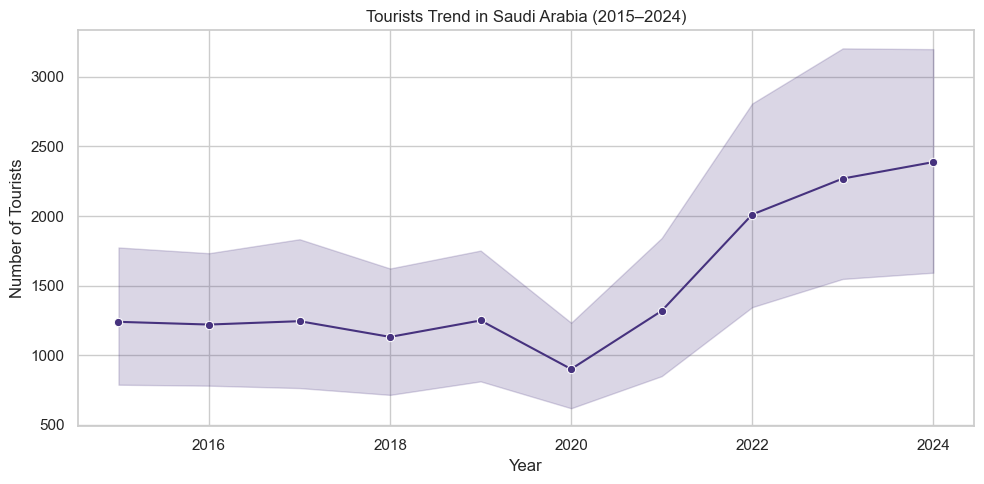

In [166]:
#Tourists per Year
plt.figure(figsize=(10,5))
sns.lineplot(data=df, x="Year_int", y="Tourists_Number", marker='o')
plt.title("Tourists Trend in Saudi Arabia (2015–2024)")
plt.xlabel("Year")
plt.ylabel("Number of Tourists")
plt.grid(True)
plt.tight_layout()
plt.savefig("figure/tourists_trend.png")
plt.show()

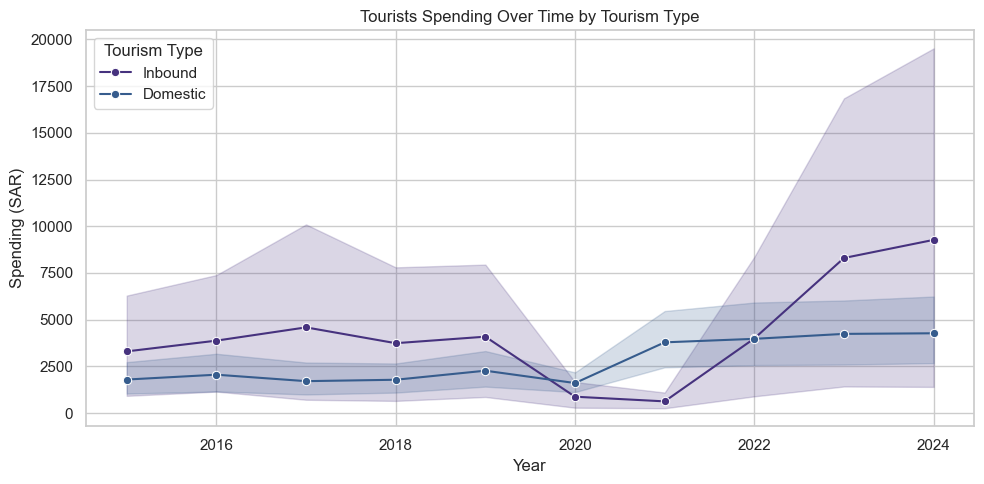

In [167]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df, x="Year_int", y="Tourists_Spending", hue="Tourism_Type", marker='o')
plt.title("Tourists Spending Over Time by Tourism Type")
plt.xlabel("Year")
plt.ylabel("Spending (SAR)")
plt.legend(title="Tourism Type")
plt.tight_layout()
plt.savefig("figure/spending_trend.png")
plt.show()

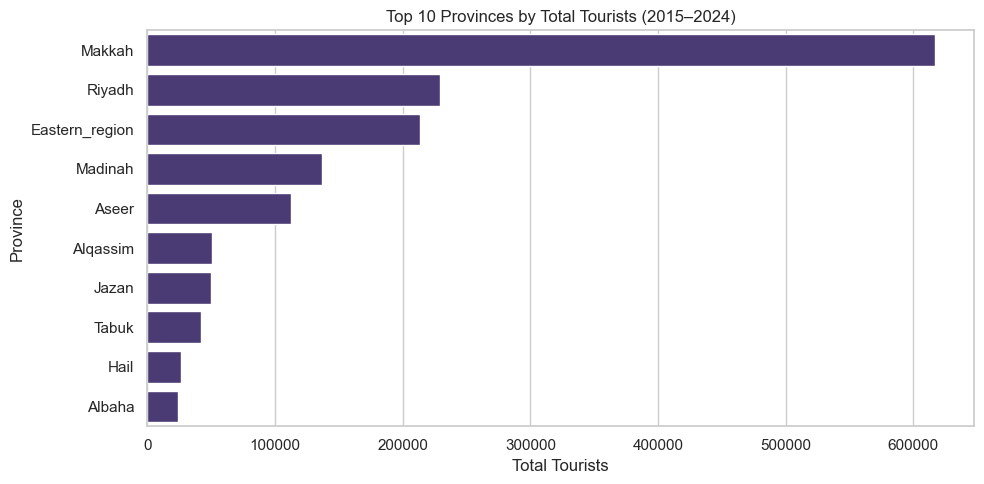

In [168]:
top_prov = df.groupby("Province")["Tourists_Number"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_prov.values, y=top_prov.index)
plt.title("Top 10 Provinces by Total Tourists (2015–2024)")
plt.xlabel("Total Tourists")
plt.ylabel("Province")
plt.tight_layout()
plt.savefig("figure/top_provinces.png")
plt.show()

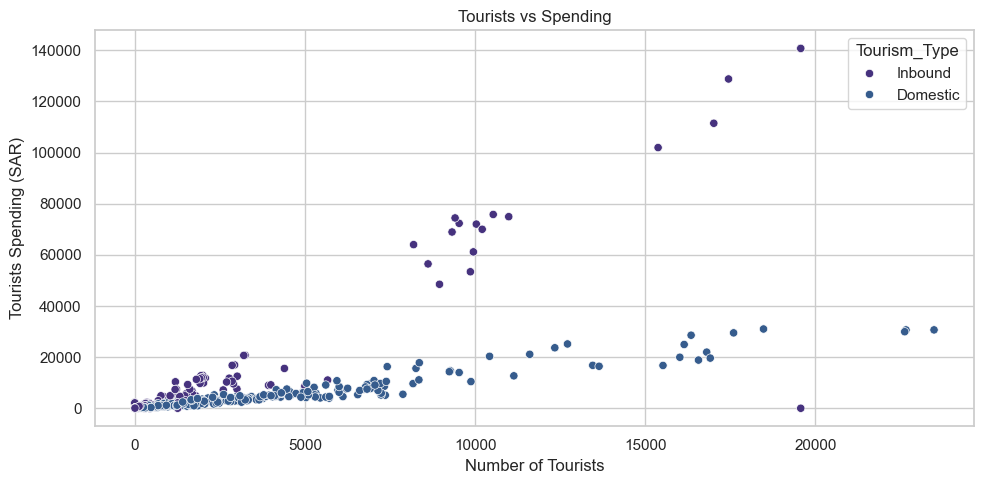

In [169]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x="Tourists_Number", y="Tourists_Spending", hue="Tourism_Type")
plt.title("Tourists vs Spending")
plt.xlabel("Number of Tourists")
plt.ylabel("Tourists Spending (SAR)")
plt.tight_layout()
plt.savefig("figure/tourists_vs_spending.png")
plt.show()

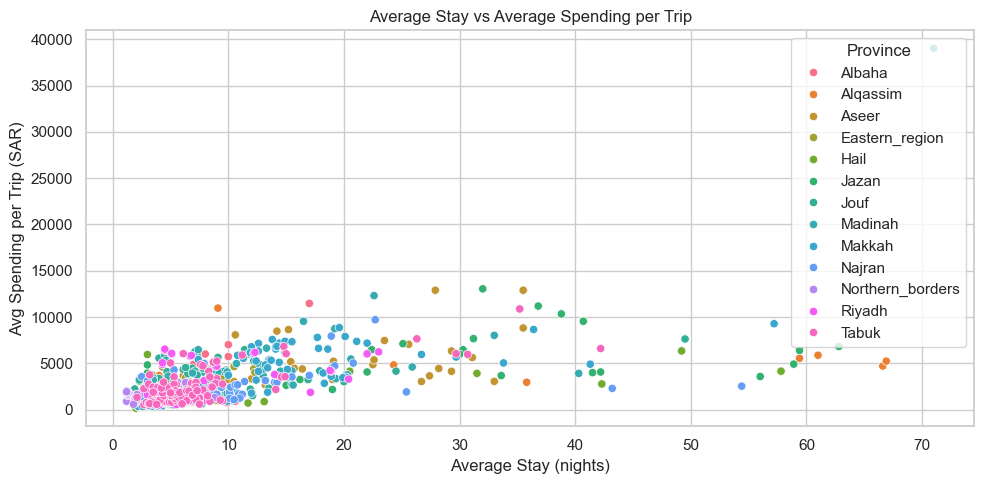

In [170]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x="Avg_Stay", y="Avg_Spending_Trip", hue="Province")
plt.title("Average Stay vs Average Spending per Trip")
plt.xlabel("Average Stay (nights)")
plt.ylabel("Avg Spending per Trip (SAR)")
plt.tight_layout()
plt.savefig("figure/stay_vs_spending.png")
plt.show()

In [171]:
df.to_csv("tourism_data_clean.csv", index=False)